<a href="https://colab.research.google.com/github/wrichard84/data201/blob/main/Python_Project_3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wrichard84/data_files/main/NYPD_Arrest_Data__Year_to_Date_.csv')

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [4]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [5]:
#Checking to see which columns have missing values and how many to determine which columns will be easier to work with
df.isna().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         21
PD_DESC                       61
KY_CD                         61
OFNS_DESC                     61
LAW_CODE                       0
LAW_CAT_CD                  1078
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [6]:
#Finding the start and end date of the data that was input into this dataset
df["ARREST_DATE"].min()

'01/01/2021'

In [7]:
df["ARREST_DATE"].max()

'09/30/2021'

In [8]:
#Getting the unique breakout of the age groups
df["AGE_GROUP"].unique()

array(['25-44', '18-24', '45-64', '<18', '65+'], dtype=object)

**I will be taking a closer look at data within this dataset specific to juveniles, or individuals categorized as 'under the age of 18.' My goal is to better understand the severity of crimes that these individuals are being arrested for, to determine what resources and services the city needs to invest in more of in order to better support the communities most in need of assistance.**

**Question 1: How many individuals under the age of 18 were arrested during this time period?**

In [9]:
#Setting Index as AGE_GROUP so I can subset this data easier
df_age_index = df.set_index("AGE_GROUP")


In [10]:
#Creating a subset of the data of just those arrests of individuals under the age of 18
df_under_18 = df_age_index.loc["<18"]

In [11]:
df_under_18.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
AGE_GROUP,,,,,,,,,,,,,,,,,,
<18,234093160,09/26/2021,490.0,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,75,0,M,WHITE HISPANIC,1018476,187132,40.680253,-73.876604,POINT (-73.87660350299996 40.68025292300007)
<18,232565683,08/22/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,B,52,0,M,BLACK,1013694,253644,40.862828,-73.893553,POINT (-73.89355304399999 40.862828025000056)
<18,232697406,08/25/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,88,0,M,BLACK,990281,192762,40.695770,-73.978252,POINT (-73.97825230899997 40.69577009300008)
<18,233113947,09/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,77,0,F,BLACK,994894,185274,40.675213,-73.961629,POINT (-73.96162862699998 40.67521289800004)
<18,234076781,09/26/2021,441.0,"LARCENY,GRAND OF AUTO",110.0,GRAND LARCENY OF MOTOR VEHICLE,PL 1553008,F,Q,105,0,M,BLACK,1046681,181205,40.663831,-73.774969,POINT (-73.77496883299993 40.66383069800003)


In [12]:
df_under_18.count()

ARREST_KEY                  3408
ARREST_DATE                 3408
PD_CD                       3408
PD_DESC                     3408
KY_CD                       3408
OFNS_DESC                   3408
LAW_CODE                    3408
LAW_CAT_CD                  3408
ARREST_BORO                 3408
ARREST_PRECINCT             3408
JURISDICTION_CODE           3408
PERP_SEX                    3408
PERP_RACE                   3408
X_COORD_CD                  3408
Y_COORD_CD                  3408
Latitude                    3408
Longitude                   3408
New Georeferenced Column    3408
dtype: int64

**There were 3,408 unique arrests for individuals under the age of 18 during this time period**

**Question 2: Of these arrests, what is the breakout between classification of arrest type: Felony (F) vs Misdemeanor (M) vs Violation (I)?**

In [13]:
df_under_18_arrest_type = df_under_18["LAW_CAT_CD"].value_counts(normalize=True)

In [14]:
print(df_under_18_arrest_type)

F    0.666373
M    0.333040
I    0.000587
Name: LAW_CAT_CD, dtype: float64


In [15]:
df_under_18["LAW_CAT_CD"].value_counts(sort=True)

F    2271
M    1135
I       2
Name: LAW_CAT_CD, dtype: int64

**Of the crimes documented in this data set that were commited by individuals under the age of 18,** 

*   **66% (2,271) were classified as felonies**
*   **33% (1,135) were classified as misdemeanors**
*   **Less than 1% (2) were classified as a violation**

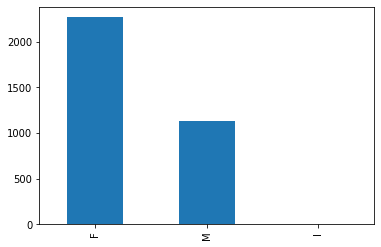

In [16]:
df_under_18["LAW_CAT_CD"].value_counts(sort=True).plot.bar()

**Question 3: Where did the majority of these arrests take place?**

In [21]:
df_under_18["ARREST_BORO"].value_counts()

K    1070
B     931
M     681
Q     586
S     140
Name: ARREST_BORO, dtype: int64

In [25]:
#Replacing the codes with the full borough names
df_under_18_boro = df_under_18["ARREST_BORO"].replace(['K', 'B', 'M', 'Q', 'S'], ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island' ])

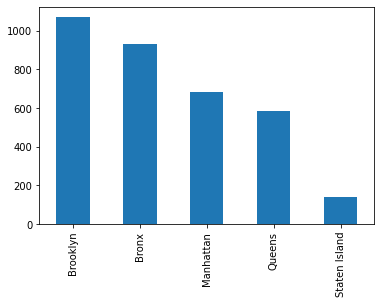

In [29]:
df_under_18_boro.value_counts().plot.bar()

**The majority of arrests made of individuals under the age of 18 occured in Brooklyn**

**In conclusion, we recommend adding additional support resources targeting individuals under 18, specifically in Brooklyn and the Bronx, with the goal of getting kids off the street and out of trouble thereby hopefully reducing the number of arrests within this age group, in these boroughs.**